In [4]:
import numpy as np
import cv2
import PIL 
from matplotlib import pyplot as plt
from mpl_toolkits.axes_grid1 import ImageGrid
import math
%matplotlib inline

In [5]:
import numpy as np
import cv2
from matplotlib import pyplot as plt
from mpl_toolkits.axes_grid1 import ImageGrid
import math
%matplotlib inline

12
perimeters: 12
contour len: 12
draw_cont: 12
listindex: 12
Cropping Complete! Let's roll!
12


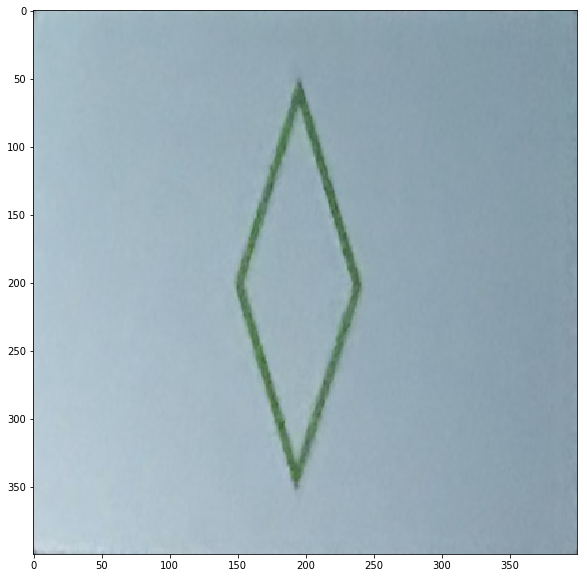

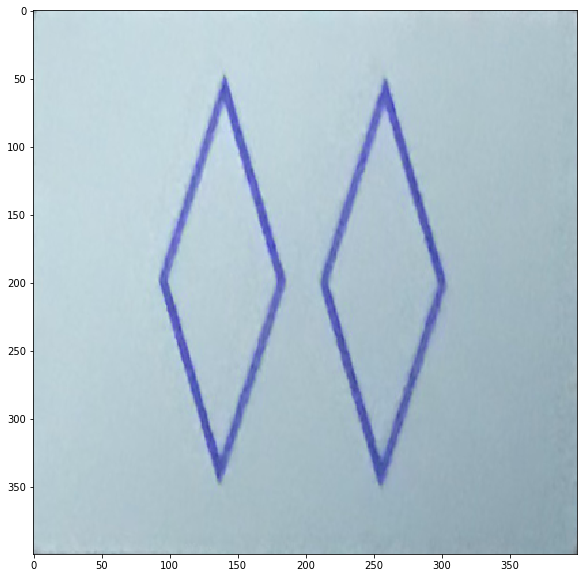

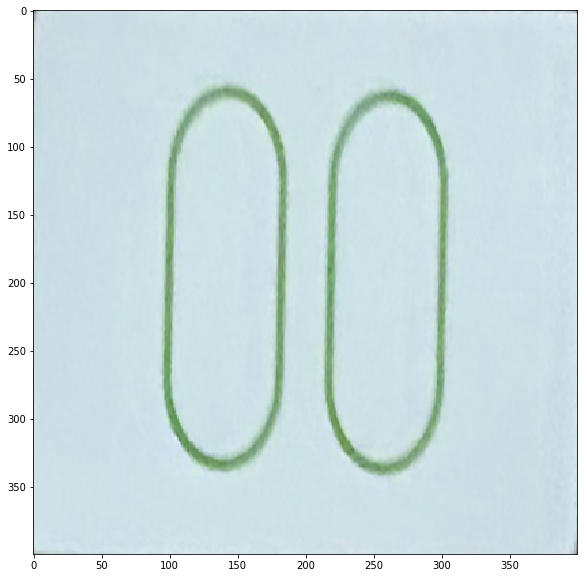

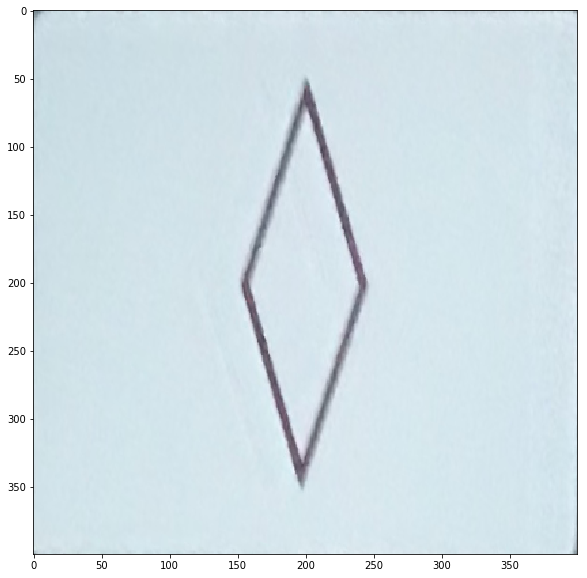

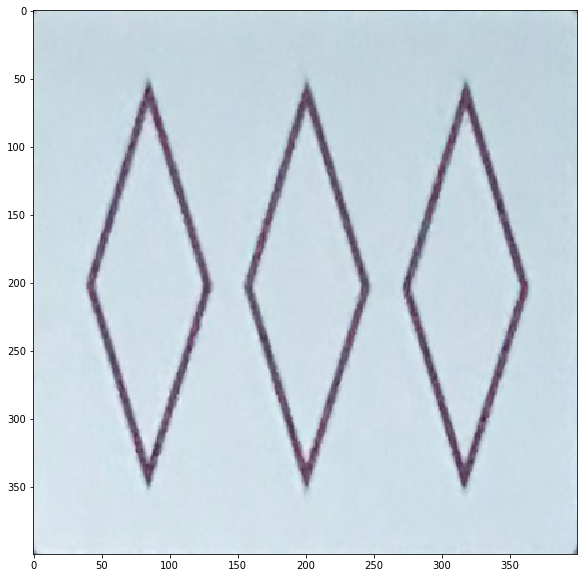

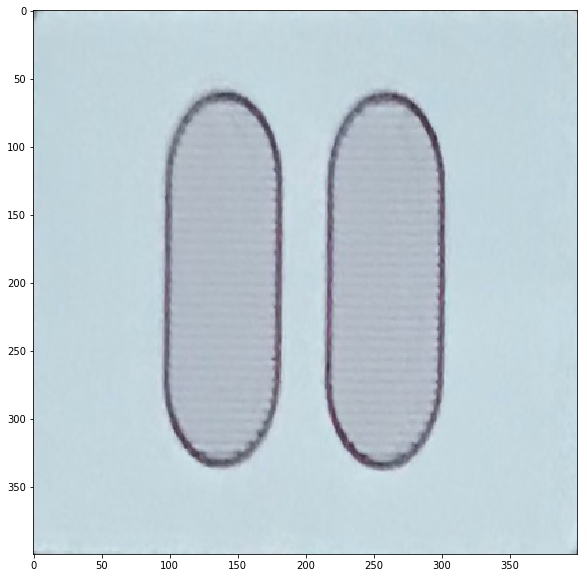

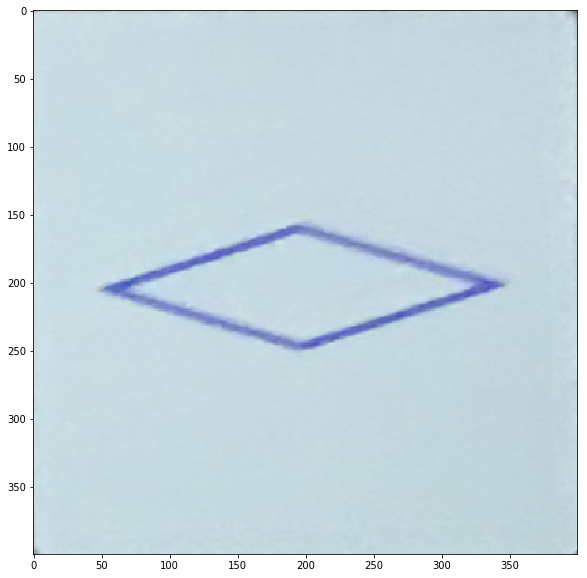

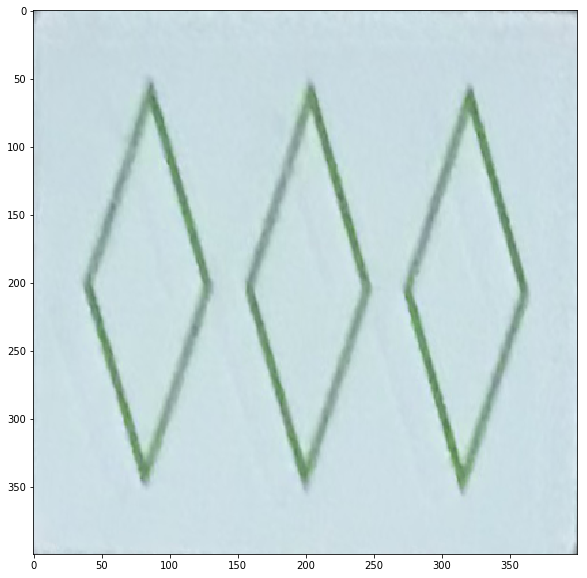

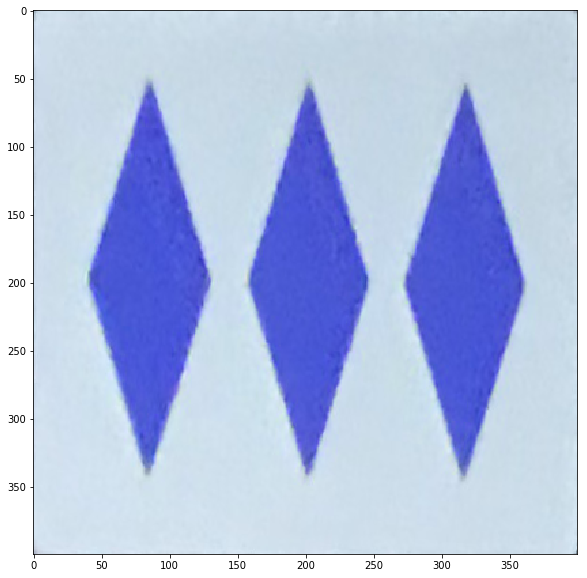

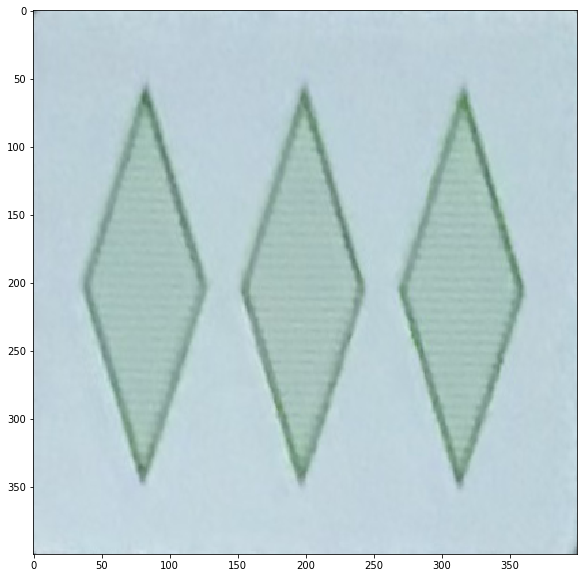

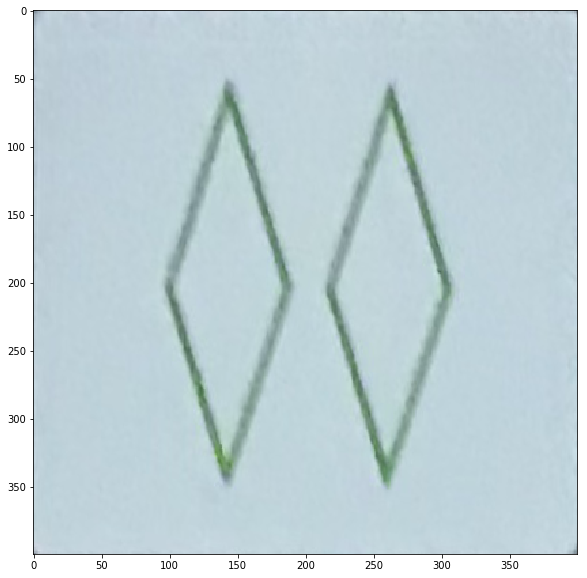

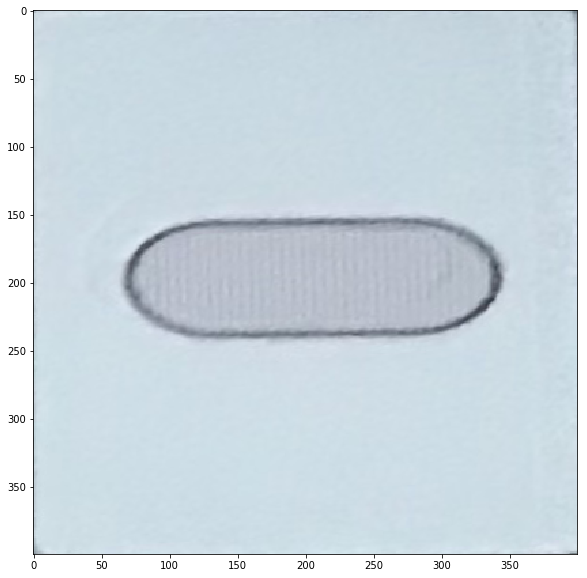

In [19]:

def Imagedetection1(imagepath,numcards,epsilon=0.02):
    img = cv2.imread(imagepath)
    gray = cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)
    blur = cv2.GaussianBlur(gray,(1,1),1000)
    flag, thresh = cv2.threshold(blur, 120, 255, cv2.THRESH_BINARY)
    # Find contours
    image,contours, hierarchy = cv2.findContours(thresh,cv2.RETR_EXTERNAL,cv2.CHAIN_APPROX_SIMPLE)
    contours = sorted(contours, key=cv2.contourArea,reverse=True)[:numcards] 
    print(len(contours))
    # Select long perimeters only
    perimeters = [cv2.arcLength(contours[i],True) for i in range(len(contours))]
    listindex=[i for i in range(numcards) if perimeters[i]>perimeters[0]/2]
    # Show image
    imgcont = img.copy()
    [cv2.drawContours(imgcont, [contours[i]], 0, (255,0,0), 5) for i in listindex]
    draw_cont = [cv2.drawContours(imgcont, [contours[i]], 0, (255,0,0), 5) for i in listindex]
    
    print("perimeters:" , len(perimeters))
    print("contour len:" , len(contours))
    print("draw_cont:" , len(draw_cont))
    print("listindex:" , len(listindex))
    
   
    warp = list(range(numcards))
    
    for i in range(numcards):
        card = contours[i]
        peri = cv2.arcLength(card,True)
        approx = cv2.approxPolyDP(card,epsilon*peri,True)
        rect = cv2.minAreaRect(contours[i])
        r = cv2.boxPoints(rect)

        h = np.float32([[0,0],[399,0],[399,399],[0,399]])
        approx = np.float32([item for sublist in approx for item in sublist])
#         print(approx.shape)
        transform = cv2.getPerspectiveTransform(approx,h)
        warp[i] = cv2.warpPerspective(img,transform,(400,400))

    # Show perspective correction
    new_img_list = []
    for i in range(numcards):
        new_img = cv2.cvtColor(warp[i],cv2.COLOR_BGR2RGB)
        new_img_list.append(new_img)
        
        cv2.imwrite(f"Image{i}.jpg",warp[i])
#     print(new_img)
    print("Cropping Complete! Let's roll!")
    print(len(new_img_list))
    
    return new_img_list
    
testone = "IMG_1817.JPG"
testtwo = "../Denmo3.jpg"
fail = "IMG_1850.JPG"
nochange ="IMG_1830.JPG"

new_imgs = Imagedetection1(testtwo,12)

for img in new_imgs:
    img = cv2.cvtColor(img,cv2.COLOR_BGR2RGB)
    plt.figure(figsize=(10,10))
    plt.imshow(img)

In [11]:
testone = "IMG_1817.JPG"
testtwo = "../Denmo3.jpg"
fail = "IMG_1850.JPG"
nochange ="IMG_1830.JPG"

In [12]:
Imagedetection1(testone,12)

12
perimeters: 12
contour len: 12
draw_cont: 12
listindex: 12
(4, 2)
(4, 2)
(4, 2)
(4, 2)
(4, 2)
(4, 2)
(4, 2)
(4, 2)
(4, 2)
(4, 2)
(4, 2)
(4, 2)
[[[138 121 111]
  [150 134 121]
  [157 141 128]
  ...
  [192 176 160]
  [179 163 147]
  [147 131 116]]

 [[155 139 126]
  [168 152 139]
  [184 168 155]
  ...
  [213 197 181]
  [209 193 177]
  [189 173 157]]

 [[166 150 137]
  [179 163 150]
  [196 180 167]
  ...
  [225 210 194]
  [225 209 193]
  [209 193 177]]

 ...

 [[196 180 165]
  [203 187 172]
  [206 190 175]
  ...
  [188 175 158]
  [181 168 151]
  [172 159 142]]

 [[171 154 140]
  [180 163 149]
  [185 169 155]
  ...
  [181 168 151]
  [173 160 143]
  [158 145 129]]

 [[141 123 111]
  [134 116 104]
  [147 129 117]
  ...
  [169 156 140]
  [138 125 109]
  [137 124 108]]]
Cropping Complete! Let's roll!
12


array([[[138, 121, 111],
        [150, 134, 121],
        [157, 141, 128],
        ...,
        [192, 176, 160],
        [179, 163, 147],
        [147, 131, 116]],

       [[155, 139, 126],
        [168, 152, 139],
        [184, 168, 155],
        ...,
        [213, 197, 181],
        [209, 193, 177],
        [189, 173, 157]],

       [[166, 150, 137],
        [179, 163, 150],
        [196, 180, 167],
        ...,
        [225, 210, 194],
        [225, 209, 193],
        [209, 193, 177]],

       ...,

       [[196, 180, 165],
        [203, 187, 172],
        [206, 190, 175],
        ...,
        [188, 175, 158],
        [181, 168, 151],
        [172, 159, 142]],

       [[171, 154, 140],
        [180, 163, 149],
        [185, 169, 155],
        ...,
        [181, 168, 151],
        [173, 160, 143],
        [158, 145, 129]],

       [[141, 123, 111],
        [134, 116, 104],
        [147, 129, 117],
        ...,
        [169, 156, 140],
        [138, 125, 109],
        [137, 124, 108]]

In [9]:
new_img_3 = cv2.cvtColor(new_img,cv2.COLOR_BGR2RGB)
plt.figure(figsize=(10,10))
plt.imshow(new_img_3)

NameError: name 'new_img' is not defined